<a href="https://colab.research.google.com/github/abdulwaheedTMU/Project2/blob/main/Project2_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Define input image shape and batch size
IMG_HEIGHT, IMG_WIDTH = 500, 500
BATCH_SIZE = 32

# Set up directories
train_dir = '/content/drive/MyDrive/Project 2 Data/Data/train'
validation_dir = '/content/drive/MyDrive/Project 2 Data/Data/valid'
test_dir = '/content/drive/MyDrive/Project 2 Data/Data/test'

# Define augmentation pipeline for training data
train_data_gen = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.RandomFlip("horizontal"),  # Random flipping
    tf.keras.layers.RandomRotation(0.1),      # Randomly rotate images
    tf.keras.layers.RandomZoom(0.1)           # Random zoom
])

# Rescaling only for validation and test data
val_test_data_gen = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255)
])

# Create training dataset
train_dataset = image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="categorical",  # Multi-class classification
    batch_size=BATCH_SIZE,
    image_size=(IMG_HEIGHT, IMG_WIDTH)
).map(lambda x, y: (train_data_gen(x, training=True), y))  # Apply augmentation pipeline

# Create validation dataset
validation_dataset = image_dataset_from_directory(
    validation_dir,
    labels="inferred",
    label_mode="categorical",
    batch_size=BATCH_SIZE,
    image_size=(IMG_HEIGHT, IMG_WIDTH)
).map(lambda x, y: (val_test_data_gen(x, training=False), y))  # Apply rescaling


Found 1942 files belonging to 3 classes.
Found 431 files belonging to 3 classes.


In [ ]:
from tensorflow.keras import layers, models

# Define the model
model = models.Sequential([
    # Convolutional layers with Max Pooling
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flattening and Dense Layers
    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')  # Output layer for 3 classes
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 498, 498, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 249, 249, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 247, 247, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 123, 123, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 121, 121, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 60, 60, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 230400)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      29,491,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,548,035 (112.72 MB)

 Trainable params: 29,548,035 (112.72 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Adjust class weights to handle imbalance
class_weights = {0:2.0, 1: 1.0, 2: 2.0}

# Train the model
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=15,
    class_weight=class_weights
)


Epoch 1/15
61/61 ━━━━━━━━━━━━━━━━━━━━ 305s 4s/step - accuracy: 0.3576 - loss: 3.6932 - val_accuracy: 0.4872 - val_loss: 0.9465
Epoch 2/15
61/61 ━━━━━━━━━━━━━━━━━━━━ 147s 2s/step - accuracy: 0.5667 - loss: 1.5993 - val_accuracy: 0.6218 - val_loss: 0.7932
Epoch 3/15
61/61 ━━━━━━━━━━━━━━━━━━━━ 128s 2s/step - accuracy: 0.5982 - loss: 1.4654 - val_accuracy: 0.6659 - val_loss: 0.7368
Epoch 4/15
61/61 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.6429 - loss: 1.3849 - val_accuracy: 0.6334 - val_loss: 0.7468
Epoch 5/15
61/61 ━━━━━━━━━━━━━━━━━━━━ 129s 2s/step - accuracy: 0.6359 - loss: 1.4340 - val_accuracy: 0.6148 - val_loss: 0.8009
Epoch 6/15
61/61 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - accuracy: 0.6521 - loss: 1.3257 - val_accuracy: 0.6729 - val_loss: 0.7255
Epoch 7/15
61/61 ━━━━━━━━━━━━━━━━━━━━ 129s 2s/step - accuracy: 0.6661 - loss: 1.2640 - val_accuracy: 0.6311 - val_loss: 0.7611
Epoch 8/15
61/61 ━━━━━━━━━━━━━━━━━━━━ 128s 2s/step - accuracy: 0.6760 - loss: 1.2366 - val_accuracy: 0.6589 - v

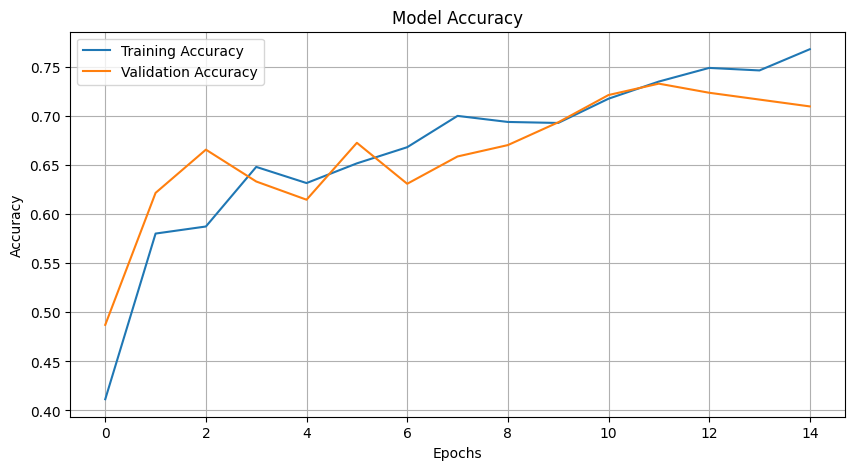

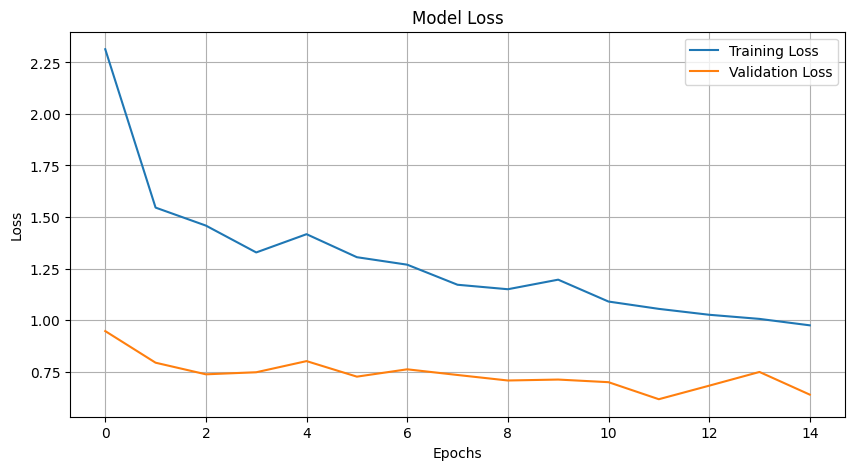

In [ ]:
import matplotlib.pyplot as plt

# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


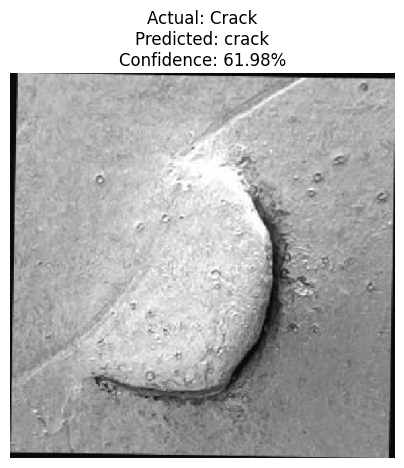

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


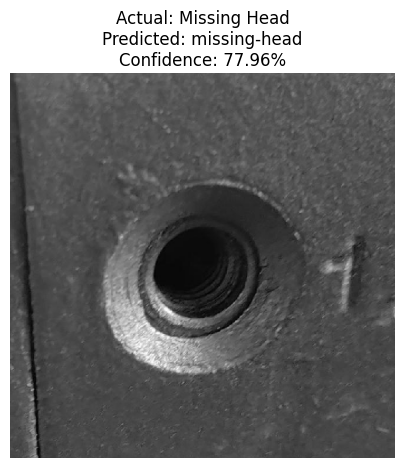

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


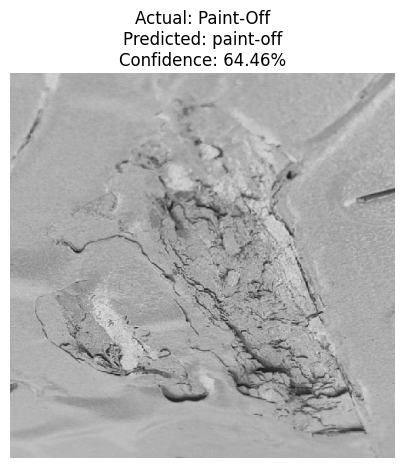

In [ ]:
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array
from IPython.display import Image, display

# Define test image paths and labels
test_images = [
    {'path': '/content/drive/MyDrive/Project 2 Data/Data/test/crack/test_crack.jpg', 'label': 'Crack'},
    {'path': '/content/drive/MyDrive/Project 2 Data/Data/test/missing-head/test_missinghead.jpg', 'label': 'Missing Head'},
    {'path': '/content/drive/MyDrive/Project 2 Data/Data/test/paint-off/test_paintoff.jpg', 'label': 'Paint-Off'}
]

# Class labels
class_labels = ['crack', 'missing-head', 'paint-off']

# Preprocess and predict for each test image
for i, test_img in enumerate(test_images):
    # Load and preprocess image
    img = load_img(test_img['path'], target_size=(IMG_HEIGHT, IMG_WIDTH))
    img_array = img_to_array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Make prediction
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]
    confidence = predictions[0][predicted_class] * 100
    predicted_label = class_labels[predicted_class]

    # Display prediction results
    plt.figure(figsize=(5, 5))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Actual: {test_img['label']}\nPredicted: {predicted_label}\nConfidence: {confidence:.2f}%")
    plt.show()
